# Plotting TC data

Unlike many other hazards, TC data is plotting across both ocean and land areas.

The extent of the data may require different projections and lat/lon limits.

In this notebook, we show an example of plotting TCs using plot_acs_hazard using the normal default layout.

We also include an example of modifying xlim, ylim, and projection so that TCs are visualised for more of the Southern Hemisphere.

In [1]:
cd /g/data/mn51/users/gt3409/plotting_maps/

/g/data/mn51/users/gt3409/plotting_maps


In [2]:
%%time
from acs_plotting_maps import *
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from matplotlib import colors, cm

regions = regions_dict['ncra_regions']


CPU times: user 15.1 s, sys: 961 ms, total: 16 s
Wall time: 22 s


(<Figure size 600x450 with 2 Axes>, <GeoAxes: >)

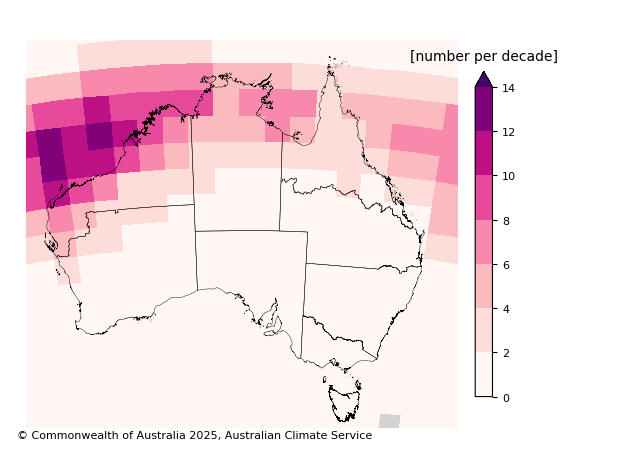

In [3]:
filename="/g/data/ia39/ncra/tropical_cyclones/Spatial_Density/CDD_ensemble-common_number-per-decade_2.5dx2.5d_1970-2000.nc"

ds =  xr.open_dataset(filename).rename({"longitude":"lon", "latitude":"lat"})
var="number_per_decade"

plot_acs_hazard(data=ds[var],
                title="",
                cmap=cm.RdPu,
                cbar_extend= "max",
                cbar_label="[number per decade]",
                ticks=np.arange(0,16,2),
                regions = regions,
                mask_not_australia=False,
                mask_australia=False,
                watermark="",
                issued_date="",
                outfile=f"figures/TCs",
                )


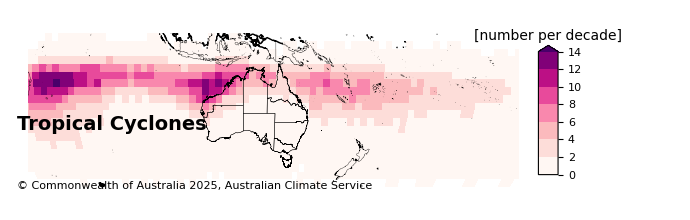

In [4]:
filename="/g/data/ia39/ncra/tropical_cyclones/Spatial_Density/CDD_ensemble-common_number-per-decade_2.5dx2.5d_1970-2000.nc"

ds =  xr.open_dataset(filename).rename({"longitude":"lon", "latitude":"lat"})
var="number_per_decade"

fig, ax = plot_acs_hazard(data=ds[var],
                            title="Tropical Cyclones",
                            cmap=cm.RdPu,
                            cmap_bad="none",
                            cbar_extend= "max",
                            cbar_label="[number per decade]",
                            ticks=np.arange(0,16,2),
                            regions = regions,
                            mask_not_australia=False,
                            mask_australia=False,
                            coastlines=True,
                            watermark="",
                            issued_date="",
                            xlim=(50, 230),
                            ylim=(-50, 0),
                            outfile=f"figures/TCs_wide",
                            projection=ccrs.Robinson(central_longitude=130),
                            figsize=(6.7, 2),
            
                            )
ax.coastlines(resolution='10m')


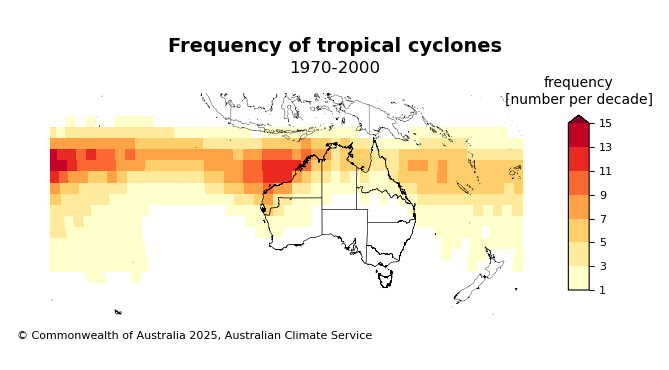

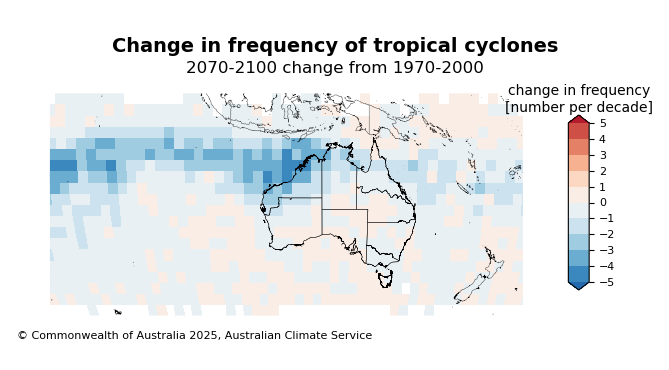

In [5]:

ds_current =  xr.open_dataset("/g/data/ia39/ncra/tropical_cyclones/Spatial_Density/CDD_ensemble-common_number-per-decade_2.5dx2.5d_1970-2000.nc").rename({"longitude":"lon", "latitude":"lat"})
ds_future =  xr.open_dataset("/g/data/ia39/ncra/tropical_cyclones/Spatial_Density/CDD_ensemble-common_number-per-decade_2.5dx2.5d_2070-2100-minus-1970-2000.nc").rename({"longitude":"lon", "latitude":"lat"})
var="number_per_decade"

fig, ax = plot_acs_hazard_1pp(data=ds_current[var].where(ds_current[var]>1),
                            title="Frequency of tropical cyclones",
                              date_range="1970-2000",
                            cmap=cm.YlOrRd,
                            cmap_bad="none",
                            cbar_extend= "max",
                            cbar_label="frequency\n[number per decade]",
                            ticks=np.arange(1,16,2),
                            regions = regions,
                            mask_not_australia=False,
                            mask_australia=False,
                            coastlines=True,
                            watermark="",
                            issued_date="",
                            xlim=(60, 180),
                            ylim=(-50, 0),
                            projection=ccrs.Robinson(central_longitude=130),
                            figsize=(6.5, 3.5),
                            )

fig, ax = plot_acs_hazard_1pp(data=ds_future[var],
                            title="Change in frequency of tropical cyclones",
                              date_range="2070-2100 change from 1970-2000",
                            cmap=cm.RdBu_r,
                            cmap_bad="none",
                            cbar_extend= "both",
                            cbar_label="change in frequency\n[number per decade]",
                              vcentre=0,
                            ticks=np.arange(-5,5.1,1),
                            regions = regions,
                            mask_not_australia=False,
                            mask_australia=False,
                            coastlines=True,
                            watermark="",
                            issued_date="",
                            xlim=(60, 180),
                            ylim=(-50, 0),
                            projection=ccrs.Robinson(central_longitude=130),
                            figsize=(6.5, 3.5),
                            )
